In [1]:
# imports
from astropy.io import fits
from scipy import interpolate as sin
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotting as myP
import numpy as np
import csv 
import match
import SED

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Read Data

In [3]:
# read AGN IDs
agnIDs = myP.ReadFile(path_csv+'\ID_RedYelBlu_AGNselection.csv')

# convert agnIDs into list of integer numpy arrays 
agnIDs_npArray = []
for row in agnIDs : 
    agnIDs_npArray.append(np.array(row, dtype=int))

Cropped:  ['Row 1 = red IR selected AGN. Row 2 = yellow both IR-Xray AGN. Row 3 = blue X-ray selected AGN. Row 4 = blue X-ray selected AGN with IRAC detections. Row 5 = blue X-ray selected AGN without IRAC detections. Row 6 = red IR selected AGN with 24um detection. Row 7 = yellow both IR-Xray AGN with 24um detection. Row 8 = blue X-ray selected AGN with 24um and IRAC detections. Values are ID_COSMOS2015.']


In [4]:
# constants for AGN type index

RED = 0     # red       IR selected AGN
YEL = 1     # yellow    both IR-Xray AGN
BLU = 2     # blue      X-ray selected AGN

BYI = 3     # blue      X-ray selected AGN  with IRAC detections
BNI = 4     # blue      X-ray selected AGN  without IRAC detections

R24 = 5     # red       IR selected AGN     with 24um detection
Y24 = 6     # yellow    both IR-Xray AGN    with 24um detection
B24 = 7     # blue      X-ray selected AGN  with 24um and IRAC detections

In [5]:
def PrintNumber(myList) : 
    # make list of AGN names for printting info 
    agnTypeNames = ['Red:\t', 'Yel:\t', 'Blu:\t', 'Byi:\t', 'Bni:\t', 'r24:\t', 'y24:\t', 'r24:\t']
    # print name and number of items in list 
    for name, row in zip(agnTypeNames, myList) : 
        print(name, row.shape)

In [6]:
# print number of sources in agnIDs_npArray
PrintNumber(agnIDs_npArray)

Red:	 (886,)
Yel:	 (647,)
Blu:	 (1529,)
Byi:	 (1378,)
Bni:	 (151,)
r24:	 (476,)
y24:	 (533,)
r24:	 (984,)


In [7]:
# read redshifts
zAll = np.array(myP.ReadFile(path_cat+'\COSMOS_z_matches.csv'))
zID, zZ = zAll.T
# get correct data type
zID = np.array(zID, dtype=int)
zZ  = np.array(zZ,  dtype=float)
# apply mask to remove bad redshifts
mask_z = (zZ >= 0) & (zZ < 99)
zID = zID[mask_z]
zZ  = zZ[mask_z]
# print info
print('Number of sources w/ z:', len(zID))

Cropped:  ['ID', 'z']
Number of sources w/ z: 485793


In [8]:
agn_z = []
agn_ID_wZ = []

for row in agnIDs_npArray : 
    # match redshift against AGN IDs
    key_z_agn, key_agn_z = match.match(zID, row)
    # get redshift array for AGN
    agn_z.append(zZ[key_z_agn])
    # get AGN ID arrays w/ redshifts
    agn_ID_wZ.append(row[key_agn_z])

# PrintNumber(agn_z)

In [9]:
# open COSMOS 2020 catalog file and get data 
inf20 = fits.open(path_cat+'\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data20 = inf20[1].data
inf20.close()

In [10]:
Fnu_uJy = SED.GetPhotometry(data20)
IDs_all = SED.GetID(data20)
lam_A   = SED.GetObservedWavelengths_A()

Array shape:	 (1720700, 20)
Array shape:	 (1720700,)
Array shape:	 (20,)


In [11]:
agn_Fnu_uJy = []
agn_ID_wZ_wPhot = []

for row in agn_ID_wZ : 
    # match photometry IDs against AGN IDs 
    key_IDall_agn, key_agn_IDall = match.match(IDs_all, row)
    # get photometry for AGN
    agn_Fnu_uJy.append(Fnu_uJy[key_IDall_agn])
    # get AGN arrays with photometry 
    agn_ID_wZ_wPhot.append(row[key_agn_IDall])

# PrintNumber(agn_Fnu_uJy)

# Preapare SED

In [12]:
agn_lamR_A = []

# convert each AGN type to rest wavelength
for row in agn_z : 
    agn_lamR_A.append(SED.ConvertToRestWavelength(row))

Array shape:	 (886, 20)
Array shape:	 (647, 20)
Array shape:	 (1529, 20)
Array shape:	 (1378, 20)
Array shape:	 (151, 20)
Array shape:	 (476, 20)
Array shape:	 (533, 20)
Array shape:	 (984, 20)


In [13]:
agn_lamFlam_ergscm2 = []

# convert each AGN type to energy density
for lamR,Fnu in zip(agn_lamR_A, agn_Fnu_uJy) : 
    agn_lamFlam_ergscm2.append(SED.ConvertToEnergyDensity(lamR,Fnu))

Array shape:	 (886, 20)
Array shape:	 (647, 20)
Array shape:	 (1529, 20)
Array shape:	 (1378, 20)
Array shape:	 (151, 20)
Array shape:	 (476, 20)
Array shape:	 (533, 20)
Array shape:	 (984, 20)


In [14]:
agn_lamFlam_ergscm2_norm = []

# normalize each AGN type at 1um
for lamR,lamFlam in zip(agn_lamR_A, agn_lamFlam_ergscm2) : 
    agn_lamFlam_ergscm2_norm.append(SED.NormalizeSED_1um(lamR,lamFlam))

Array shape:	 (886, 20)
Array shape:	 (647, 20)
Array shape:	 (1529, 20)
Array shape:	 (1378, 20)
Array shape:	 (151, 20)
Array shape:	 (476, 20)
Array shape:	 (533, 20)
Array shape:	 (984, 20)


# Plot

In [15]:
# set standard plot format
myP.SetStyle()

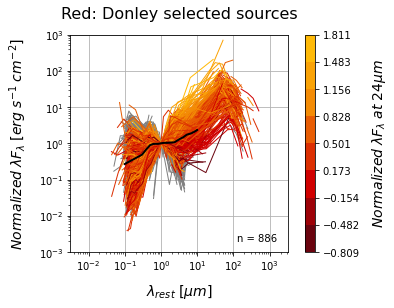

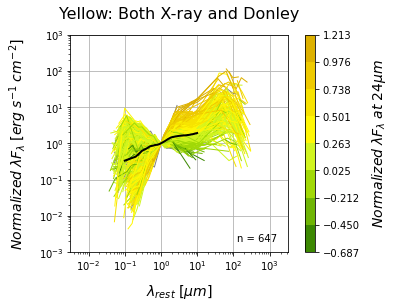

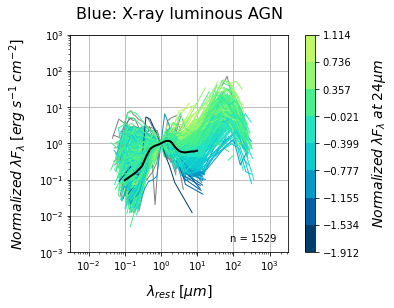

In [16]:
# plot SEDs for all color AGN 
SED.PlotSED(agn_lamR_A[RED], agn_lamFlam_ergscm2_norm[RED], cmap='r', save=path_fig+'\COSMOS_SED_red.png', title='Red: Donley selected sources')
SED.PlotSED(agn_lamR_A[YEL], agn_lamFlam_ergscm2_norm[YEL], cmap='y', save=path_fig+'\COSMOS_SED_yel.png', title='Yellow: Both X-ray and Donley')
SED.PlotSED(agn_lamR_A[BLU], agn_lamFlam_ergscm2_norm[BLU], cmap='b', save=path_fig+'\COSMOS_SED_blu.png', title='Blue: X-ray luminous AGN')

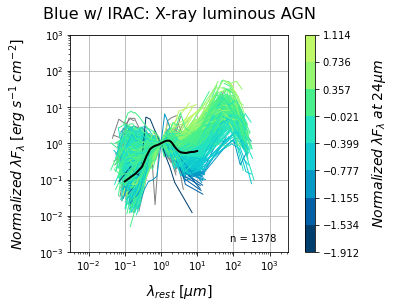

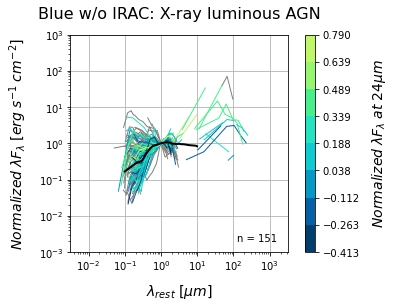

In [17]:
# plot SEDs for split blue 
SED.PlotSED(agn_lamR_A[BYI], agn_lamFlam_ergscm2_norm[BYI], cmap='b', save=path_fig+'\COSMOS_SED_byi.png', title='Blue w/ IRAC: X-ray luminous AGN')
SED.PlotSED(agn_lamR_A[BNI], agn_lamFlam_ergscm2_norm[BNI], cmap='b', save=path_fig+'\COSMOS_SED_bni.png', title='Blue w/o IRAC: X-ray luminous AGN')

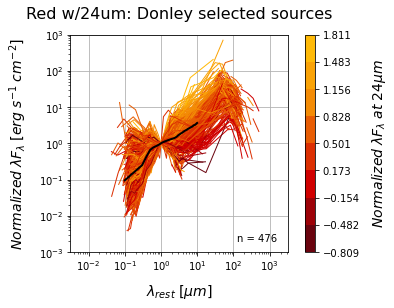

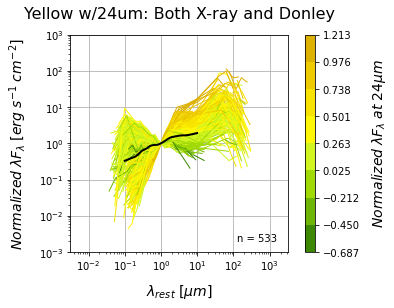

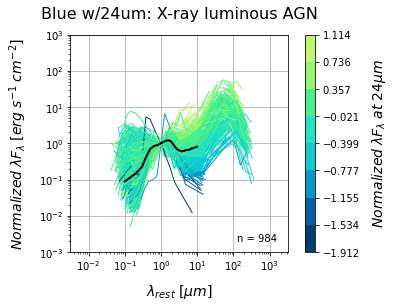

In [18]:
# plot SEDs for all color AGN with 24um detections 
SED.PlotSED(agn_lamR_A[R24], agn_lamFlam_ergscm2_norm[R24], cmap='r', save=path_fig+'\COSMOS_SED_r24.png', title='Red w/24um: Donley selected sources')
SED.PlotSED(agn_lamR_A[Y24], agn_lamFlam_ergscm2_norm[Y24], cmap='y', save=path_fig+'\COSMOS_SED_y24.png', title='Yellow w/24um: Both X-ray and Donley')
SED.PlotSED(agn_lamR_A[B24], agn_lamFlam_ergscm2_norm[B24], cmap='b', save=path_fig+'\COSMOS_SED_b24.png', title='Blue w/24um: X-ray luminous AGN')

Array shape:	 (3062, 20)
Array shape:	 (3062, 20)


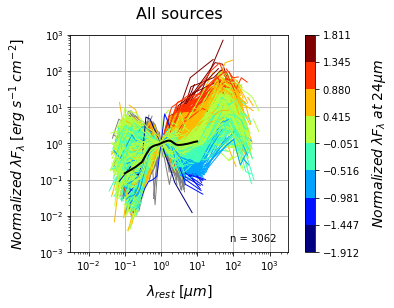

In [19]:
# get array for all sources
all_lamR_A = np.concatenate((agn_lamR_A[RED],agn_lamR_A[YEL],agn_lamR_A[BLU]), axis=0)
all_lamFlam_ergscm2_norm = np.concatenate((agn_lamFlam_ergscm2_norm[RED],agn_lamFlam_ergscm2_norm[YEL],agn_lamFlam_ergscm2_norm[BLU]), axis=0)

# verify
SED.PrintShape(all_lamR_A)
SED.PrintShape(all_lamFlam_ergscm2_norm)

# plot SED for all sources
SED.PlotSED(all_lamR_A, all_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all.png', title='All sources')

Array shape:	 (1993, 20)
Array shape:	 (1993, 20)


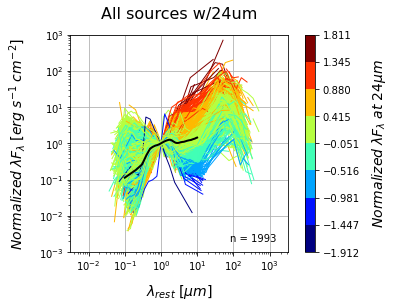

In [31]:
# get array for all sources
all24_lamR_A = np.concatenate((agn_lamR_A[R24],agn_lamR_A[Y24],agn_lamR_A[B24]), axis=0)
all24_lamFlam_ergscm2_norm = np.concatenate((agn_lamFlam_ergscm2_norm[R24],agn_lamFlam_ergscm2_norm[Y24],agn_lamFlam_ergscm2_norm[B24]), axis=0)

# verify
SED.PrintShape(all24_lamR_A)
SED.PrintShape(all24_lamFlam_ergscm2_norm)

# plot SED for all sources
SED.PlotSED(all24_lamR_A, all24_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all24.png', title='All sources w/24um')

# Bin by Redshift

In [20]:
agn_lamR_A_z01 = []
agn_lamFlam_ergscm2_norm_z01 = []

for z,lamR,lamFlam in zip(agn_z, agn_lamR_A,agn_lamFlam_ergscm2_norm) : 
    # get mask for redshifts between 0<z<1
    mask = (z > 0) & (z <= 1)
    # get rest wavelengths for sources
    agn_lamR_A_z01.append(lamR[mask])
    # get energy density for sources
    agn_lamFlam_ergscm2_norm_z01.append(lamFlam[mask])


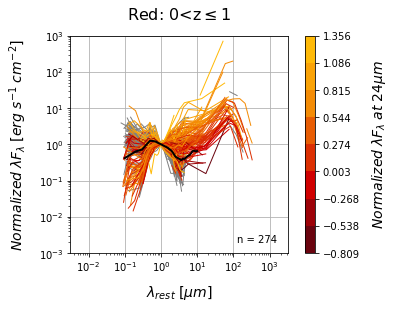

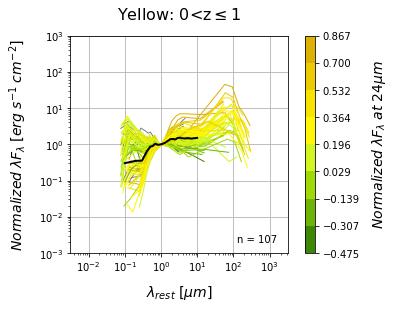

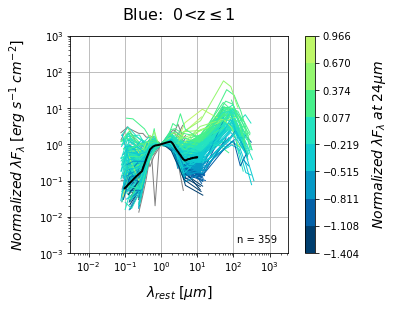

In [21]:
# plot SEDs for 0<z<1 for all color AGN 
SED.PlotSED(agn_lamR_A_z01[RED], agn_lamFlam_ergscm2_norm_z01[RED], cmap='r', save=path_fig+'\COSMOS_SED_red_0z1.png', title='Red: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[YEL], agn_lamFlam_ergscm2_norm_z01[YEL], cmap='y', save=path_fig+'\COSMOS_SED_yel_0z1.png', title='Yellow: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[BLU], agn_lamFlam_ergscm2_norm_z01[BLU], cmap='b', save=path_fig+'\COSMOS_SED_blu_0z1.png', title='Blue:  0<z$\leq$1')

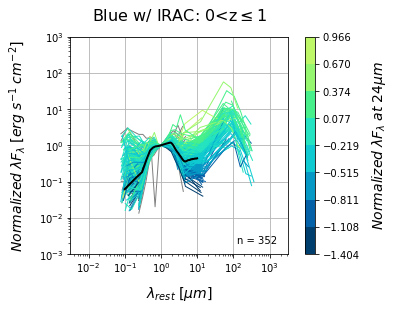

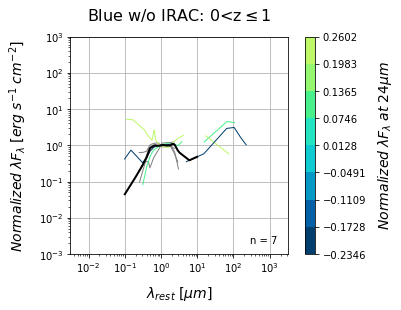

In [22]:
# plot SEDs for 0<z<1 for split blue
SED.PlotSED(agn_lamR_A_z01[BYI], agn_lamFlam_ergscm2_norm_z01[BYI], cmap='b', save=path_fig+'\COSMOS_SED_byi_0z1.png', title='Blue w/ IRAC: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[BNI], agn_lamFlam_ergscm2_norm_z01[BNI], cmap='b', save=path_fig+'\COSMOS_SED_bni_0z1.png', title='Blue w/o IRAC: 0<z$\leq$1')

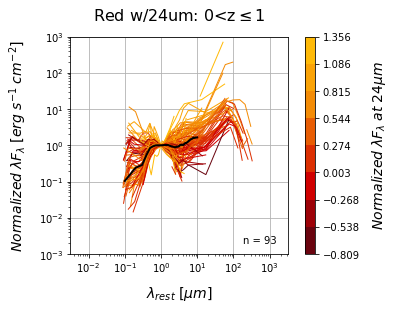

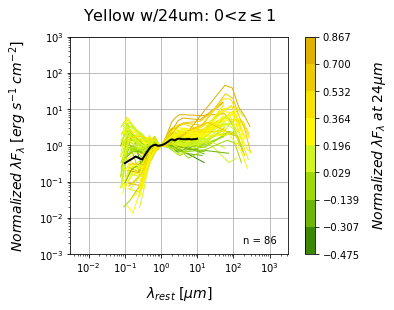

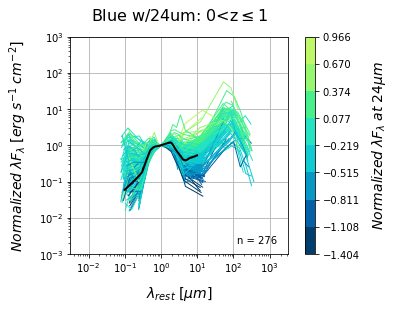

In [23]:
# plot SEDs for all color AGN with 24um detections 
SED.PlotSED(agn_lamR_A_z01[R24], agn_lamFlam_ergscm2_norm_z01[R24], cmap='r', save=path_fig+'\COSMOS_SED_r24_z01.png', title='Red w/24um: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[Y24], agn_lamFlam_ergscm2_norm_z01[Y24], cmap='y', save=path_fig+'\COSMOS_SED_y24_z01.png', title='Yellow w/24um: 0<z$\leq$1')
SED.PlotSED(agn_lamR_A_z01[B24], agn_lamFlam_ergscm2_norm_z01[B24], cmap='b', save=path_fig+'\COSMOS_SED_b24_z01.png', title='Blue w/24um: 0<z$\leq$1')

# Investigate 10um

In [24]:
# offset = 13
# test = np.arange(0,10,1)
# test_off = [x+(offset*len(test)) for x in test]

# x = agn_lamR_A_z01[RED] [test_off]
# y = agn_lamFlam_ergscm2_norm_z01[RED] [test_off]

# SED.PlotSED(x,y,
#             title='Red: 0<z$\leq$1',
#             median=False,
#             xmin=1E-1,
#             ymin=1E-2
#             )

# Colorbar test

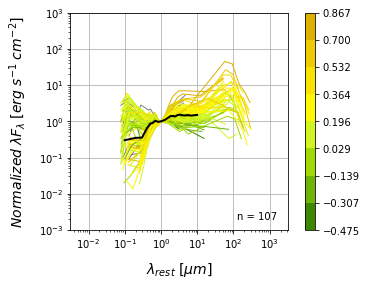

In [25]:
choice = YEL
x = agn_lamR_A_z01[choice] * 1E-4
y = agn_lamFlam_ergscm2_norm_z01[choice]

cmap_arr = ([
    mpl.colors.ListedColormap(['#6A040F','#9D0208','#D00000','#DC2F02','#E85D04','#F48C06','#FAA307','#FFBA08']),
    mpl.colors.ListedColormap(['#3C8802','#6FB505','#A1D907','#D1F520','#FFF705','#F7E200','#EECA00','#DDB100']),
    mpl.colors.ListedColormap(['#003E6E','#0461A7','#0699C6','#0FCBD1','#24E3C0','#47F08B','#94F76F','#BEF768'])
])
# cmap =  cmap_arr[choice-5]
cmap =  cmap_arr[choice]

# c1 = cmap(-1.0) # what is range? 0-1? or min-max?
# c2 = cmap(-1.1) # what is range? 0-1? or min-max?
# c3 = cmap(-1.5) # what is range? 0-1? or min-max?

# c2 = cmap(0.9) # what is range? 0-1? or min-max?
# c3 = cmap(0.5) # what is range? 0-1? or min-max?
# c4 = cmap(0.1) # what is range? 0-1? or min-max?
# c5 = cmap(0.0) # what is range? 0-1? or min-max?

# print(c1)
# print(c2)
# print(c3)
# print(c4)
# print(c5)

# colormap
z = y.T [14]
z_log = np.log10(z)
znorm = z / np.nanmax(abs(z))
znorm_log = np.log10(znorm)
znorm_log_norm = (znorm_log / np.nanmax(abs(znorm_log))) + 1 

# colorbar
min=np.nanmin(z_log)
max=np.nanmax(z_log)
n_ticks = 9
interval = (max - min) / (n_ticks - 1)
mult = np.arange(0,n_ticks)
ticks = min+(interval*mult)
norm = mpl.colors.Normalize(vmin=min, vmax=max)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.colorbar(sm, ticks=ticks ) # label='$Normalized \; \lambda F_{\lambda} \; at \; 24 \mu m$'

# n
n = np.shape(x)[0] # row

# split into no and yes 24um 
no24 = np.where(np.isnan(z))
no24_mask = (np.zeros(n, dtype=bool))
no24_mask[no24] = True 
ye24_mask = ~ no24_mask
x_no24 = x[no24_mask]
y_no24 = y[no24_mask]
x_ye24 = x[ye24_mask]
y_ye24 = y[ye24_mask]
znorm_log_norm_ye24 = znorm_log_norm[ye24_mask]

# plot SED curves
n_no24 = np.shape(x_no24)[0] # row
for i in range(n_no24) : 
    plt.plot(x_no24[i],y_no24[i], color='gray')

# plot SED curves
n_ye24 = np.shape(x_ye24)[0] # row
for i in range(n_ye24) : 
    plt.plot(x_ye24[i],y_ye24[i], color=cmap(znorm_log_norm_ye24[i]))
    
# consts
xmin=10**-2.5 
xmax=10**3.5
ymin=10**-3
ymax=10**3
# plot median
x_m, y_m = SED.MedianCurve(x, y, xmin=1E-1,xmax=1E+1)
plt.plot(x_m,y_m,c='k',linewidth=2)
# plot settings
plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('$\lambda_{rest} \; [\mu m]$') 
plt.ylabel('$Normalized \; \lambda F_{\lambda} \; [erg \; s^{-1} \; cm^{-2}]$')
plt.grid()
myP.addtext_n(n)
# axis
ax = plt.gca()
ax.set_aspect('equal')
ax.set_adjustable('box')
ax.set_xticks([1E-2,1E-1,1E0,1E1,1E2,1E3])
# display 
plt.show()   

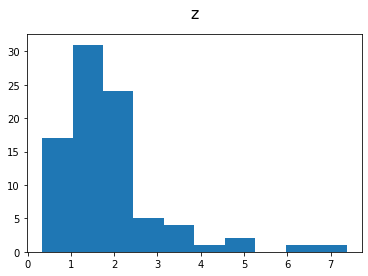

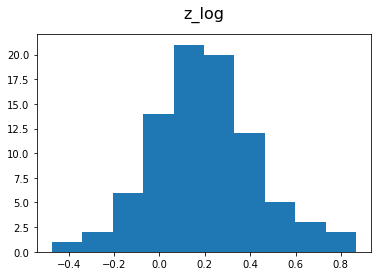

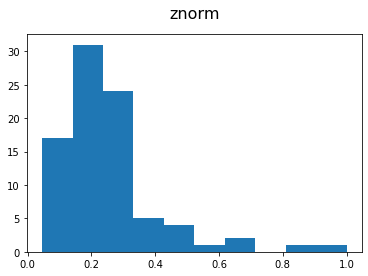

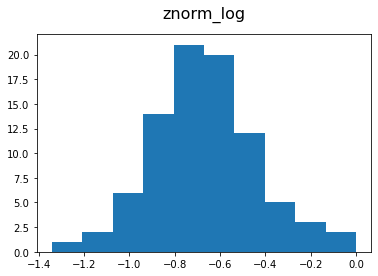

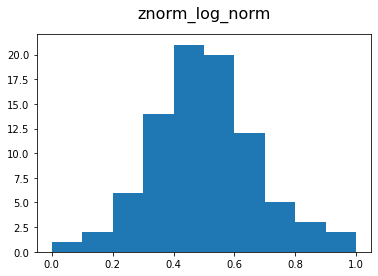

In [30]:
plt.hist(z)
plt.title('z')
plt.show()

plt.hist(z_log)
plt.title('z_log')
plt.show()

plt.hist(znorm)
plt.title('znorm')
plt.show()

plt.hist(znorm_log)
plt.title('znorm_log')
plt.show()

plt.hist(znorm_log_norm)
plt.title('znorm_log_norm')
plt.show()